In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

Using TensorFlow backend.


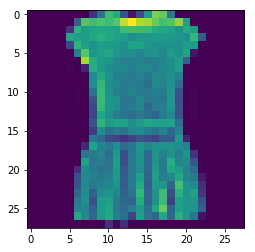

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# normalize dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

# show a picture example
plt.imshow(x_train[3])
plt.show()

In [4]:
x_test.shape

(10000, 28, 28)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu', input_dim=784))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [4]:
learning_rate = 0.01
sgd = keras.optimizers.SGD(learning_rate) # stochastic gradiend descent

model.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy', # for "non one-hot encoded" classification
              metrics=['accuracy'])

# model.compile(optimizer='sgd',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.7382 - acc: 0.7538
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.4948 - acc: 0.8268
Epoch 3/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.4492 - acc: 0.8419
Epoch 4/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.4226 - acc: 0.8531
Epoch 5/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.4023 - acc: 0.8594
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3878 - acc: 0.8639
Epoch 7/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3723 - acc: 0.8689
Epoch 8/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.3621 - acc: 0.8723
Epoch 9/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.3525 - acc: 0.8752
Epoch 10/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.3429 - acc: 0.

In [6]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 38us/step
0.3895499176263809 0.8586


In [7]:
# checking our neural network for prediction

predictions = model.predict(x_test)
np.set_printoptions(suppress=True)

# generate random number for choosing random clothes
from random import randint
clothes_index = randint(0, 9999)
print(predictions[clothes_index])

[0.00006336 0.00001484 0.01192469 0.00080374 0.12754546 0.00000118
 0.8582533  0.00000003 0.00139343 0.00000004]


In [8]:
prediction_num = np.argmax(predictions[clothes_index])
print("Model predicted: %s" % class_names[prediction_num])

Model predicted: Shirt


And in the picture was:


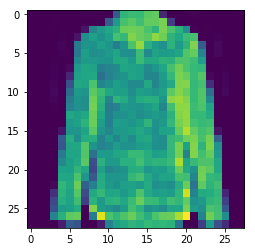

In [9]:
print("And in the picture was:")
plt.imshow(x_test[clothes_index])
plt.show()